# Data Minining Project Report
## Members
xxx

## About the Dataset
Vào quý 3 năm 2006, với sự bùng nổ về sử dụng thẻ tín dụng ở Taiwan đã phải đối mặt với cuộc khủng hoảng về nợ tiền mặt và thẻ tín dụng. Do người dùng hay ngân hàng chưa xác định được khả năng trả nợ và sử dụng thẻ tín dụng quá mức. Dẫn tới vỡ nợ và tỷ lệ tội phạm ở đây lập đỉnh. Cuộc khủng hoảng đã giáng một đòn mạng vào nền kinh tế.
</br>
Trong bài nghiên cứu này, nhóm sử dụng bộ dataset [Credit Card Default payment in Taiwan] (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) để dự đoán chủ thẻ tín dụng có khả năng vỡ nợ hay không?. Datatset và các tính chất của dataset được nhóm mô tả bên dưới.
</br>
1. ID: ID của mỗi khách hàng
2. LIMIT_BAL: Số tiền giới hạn của thẻ tín dụng
3. SEX: Giới tính (1 = male; 2 = female)
4. EDUCATION: Học vấn (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Tình trạng hôm nhân (1 = married; 2 = single; 3 = divorce; 0=others)
6. AGE: Tuổi của khách hàng
7. PAY_1 đến PAY_6: Tình trạng trả nợ từ tháng 4 tới tháng 9 năm 2005). PAY_1 = Trạng thái trả nợ tháng 9 trong đó (-2 = không sử dụng,-1 = Trả tiền ok, 0 = sử dụng tín dụng quay vòng , 1 = delay 1 tháng, 8 = delay 8 tháng).
8. BILL_AMT1 đến BILL_AMT6: Số tiền báo cáo trong hoá đơn từ tháng 4 đến tháng 9
9. PAY_AMT1 đến PAY_AMT6: Số tiền đã thanh toán trước đó từ tháng 4 đến tháng 9.
10. Default paymenet: khả năng cho vay (1=yes, 0=no)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

import gc

from datetime import datetime
from sklearn.model_selection import KFold, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 50)

In [ ]:
# Importing the Credit Card Default Dataset
df = pd.read_csv('/content/drive/MyDrive/HUCE_CS/CS_Nam_4/Data mining/UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Check df

df.info()
# 30000 rows and 25columns without missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
# drop column "ID"

df.drop('ID', axis = 1, inplace =True)

In [ ]:
# Rename the columns
df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'default.payment.next.month' : 'default_payment'}, inplace=True)

In [ ]:
# Variables description

df.describe()

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default_payment
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,4.70e+04,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,6.93e+04,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-1.57e+05,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2.67e+03,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,2.01e+04,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,6.02e+04,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1.66e+06,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


Nhìn vào giá trị trung bình của dataset ta thấy:
- Có 30,000 khách hàng khác nhau.
- Trung bình cho số tiền giới hạn thẻ tín dụng là 167.484. Với max là 1M.
- Trình độ giáo dụng phổ biến là đội đại học.
- Đội tuổi TB là 35 tuổi
- Ta thấy trung bình của cột default_payment là 0.22 tức là 22% thẻ tín dụng sẽ vỡ nợ trong tháng tiếp theo.

## Exploratory df Analysis (EDA)

### Gender

In [ ]:
# gender

# 1 : Male ; 2 : Female
gender_count = df['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
gender_count.iloc[0,0] = 'Female'
gender_count.iloc[1,0] = 'Male'
# Percentage
gender_count['percentage'] = [round(gender_count.iloc[0,1]/len(df)*100, 1),round(gender_count.iloc[1,1]/len(df)*100, 1)]

gender_count

,gender,count,percentage
0,Female,18112,60.4
1,Male,11888,39.6


In [ ]:
fig = px.bar(gender_count, y='count', x='gender', text='percentage',color= 'gender',
            title = 'Count plot of Gender',
            labels={ # replaces default labels by column name
                "gender": "Gender",  "count": "Count", "percentage": "Percentage"
            },
            color_discrete_map={ # replaces default color mapping by value
                "Male": "royalblue", "Female": "crimson"
            },
            template="simple_white"
            )

fig.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide',showlegend = False)
fig.show()

Có tới 60% thẻ tín dụng là của hội chị em và 40% là của cánh đàn ông.
Cho thấy, mức độ tiêu dùng của chị em nhiều hơn.

Text(0.5, 1.0, 'Default Credit Card Clients - Default Payment Next Month')

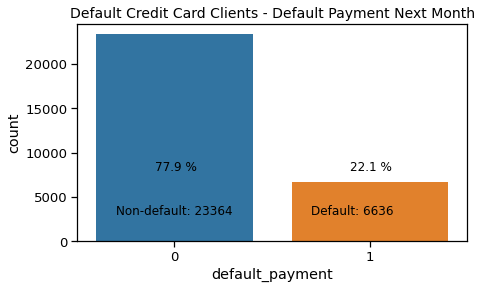

In [ ]:
# The frequency of defaults
yes = df['default_payment'].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default_payment',data=df)
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Default Credit Card Clients - Default Payment Next Month', size=14)

Có khoảng 78% số lượng khách hàng không vỡ nợ, chỉ 22% khách hàng (439 kháng hàng) có khả năng vỡ nợ trong tháng tiếp theo. Và dataset đã bị unbalanced

In [ ]:
# education

edu_count = df['education'].value_counts().reset_index().rename(columns={'index':'index','education':'count'})

edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High School'
edu_count['index'][3] = 'Unknown_5'
edu_count['index'][4] = 'Others'
edu_count['index'][5] = 'Unknown_6'
edu_count['index'][6] = 'Unknown_0'

fig = go.Figure(go.Bar(
    x = edu_count['index'],y = edu_count['count'],text = edu_count['count'],marker={'color': edu_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Distribution of Education Level',xaxis_title="Education Status",yaxis_title="Number of customers")
fig.show()

Số lượng sử dụng thẻ tin dụng đối với sinh viên đại học là nhiều nhất.

In [ ]:
marriage_count = df['marital_status'].value_counts().reset_index().rename(columns={'index':'class','marital_status':'count'})
# marital_status
marriage_count['class'][0] = 'Single'
marriage_count['class'][1] = 'Married'
marriage_count['class'][2] = 'Divorce'
marriage_count['class'][3] = 'Others'

fig = go.Figure(go.Bar(
    x = marriage_count['class'],y = marriage_count['count'],text = marriage_count['count'],marker={'color': marriage_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of Marital Status',xaxis_title="Marital Status",yaxis_title="Number of count")
fig.show()

Hơn một nửa số khách hàng sử dụng thẻ tín dụng là độc thân. Và khách hàng đã kết hôn chiến 45% tổng khách hàng.

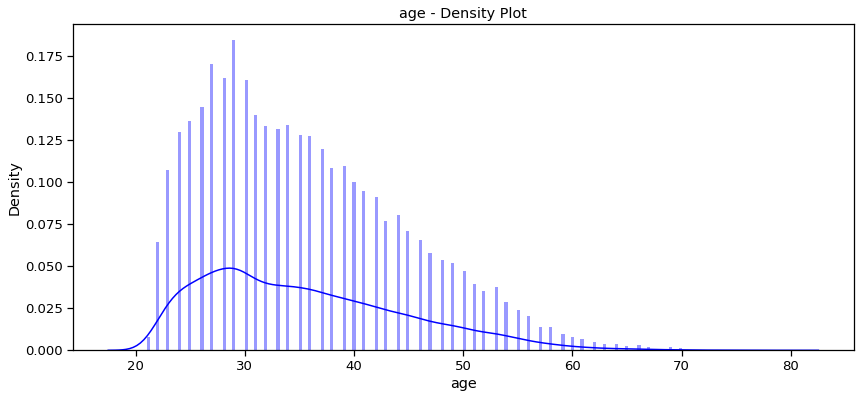

In [ ]:
# age

plt.figure(figsize = (14,6))
plt.title('age - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df["age"],kde=True,bins=200, color="blue")
plt.show()

In [ ]:
df.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'payment_status_sept', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'payment_amount_sept', 'payment_amount_aug', 'payment_amount_jul',
       'payment_amount_jun', 'payment_amount_may', 'payment_amount_apr',
       'default_payment'],
      dtype='object')

Độ tuổi của khách hàng trong khoảng 20 tới 40, và phổ biến nhất trong khoảng 30 tuổi.

In [ ]:
# History of past payment status

pay_s = df[['payment_status_sept','payment_status_aug', 'payment_status_jul', 'payment_status_jun', 'payment_status_may', 'payment_status_apr']]
df['payment_status_sept'].value_counts().index.to_list().sort()

fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())

fig.add_trace(go.Histogram(x= df["payment_status_sept"],name='payment_status_sept'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["payment_status_aug"],name='payment_status_aug'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["payment_status_jul"],name='payment_status_jul'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["payment_status_jun"],name='payment_status_jun'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["payment_status_may"],name='payment_status_may'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["payment_status_apr"],name='payment_status_apr'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=1200, title_text="Histogram Subplots of Past Payment Status",showlegend=False)
fig.show()

Trong đó:
- -2: Không sử dụng thẻ tín dụng
- -1: Thanh toán đầy đủ
- 0: Sử dụng tín dụng quay vòng
- 1: delay 1 tháng,...
</br>
Ta thấy: Có rất ít khách hàng thanh toán sau 2 tháng. Hầu hết họ sử dụng **tín dụng quay vòng** để trả nợ. Đặc biệt có khá nhiều khách hàng **không sử dụng** tín dụng.

### Further Exploration - Bivariate Analysis

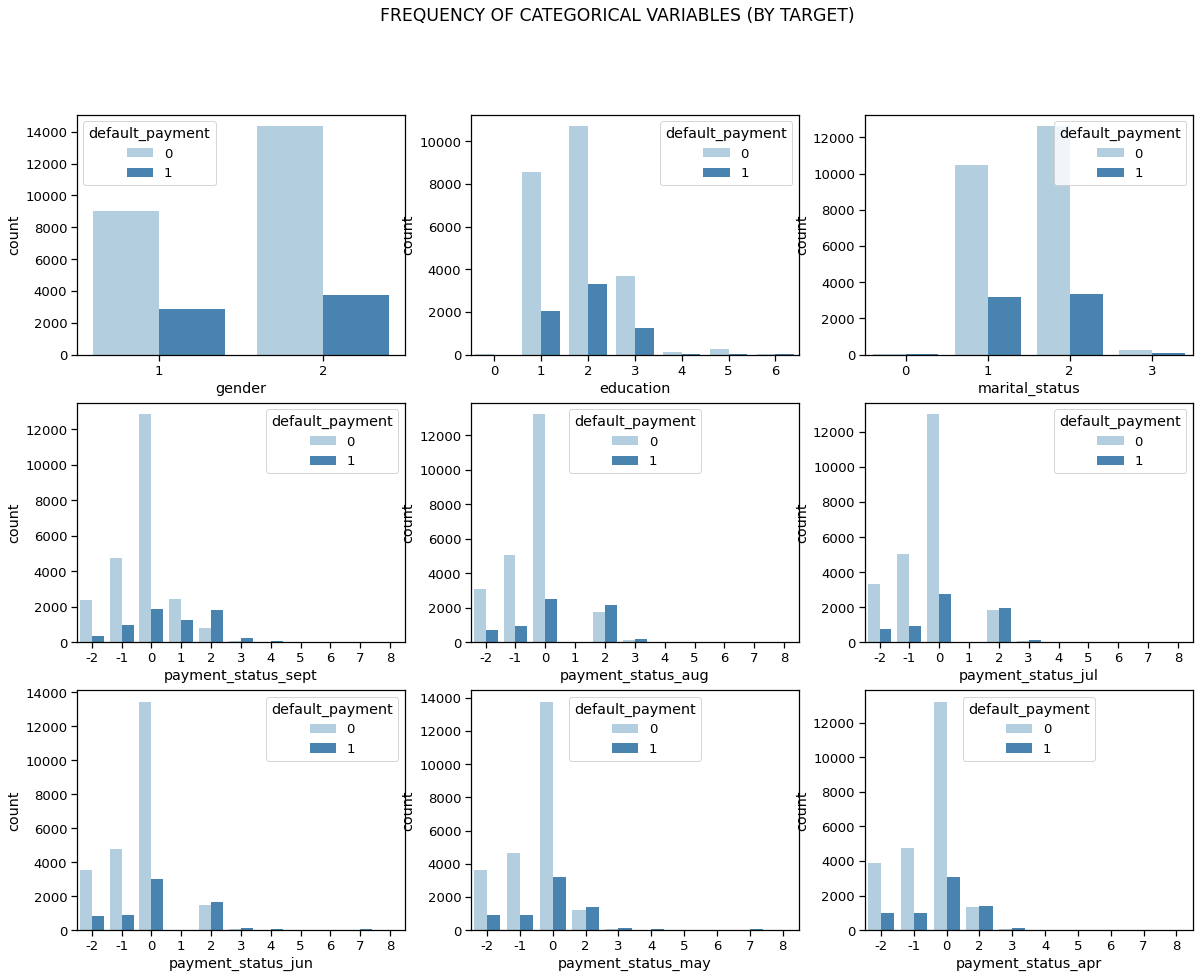

In [ ]:
# Creating a new data frame with categorical variables

subset = df[['gender', 'education', 'marital_status', 'payment_status_sept','payment_status_aug',
             'payment_status_jul', 'payment_status_jun', 'payment_status_may', 'payment_status_apr','default_payment']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="gender", hue="default_payment", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="education", hue="default_payment", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="marital_status", hue="default_payment", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="payment_status_sept", hue="default_payment", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="payment_status_aug", hue="default_payment", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="payment_status_jul", hue="default_payment", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="payment_status_jun", hue="default_payment", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="payment_status_may", hue="default_payment", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="payment_status_apr", hue="default_payment", data=subset, palette="Blues", ax=axes[2,2])

Khách hàng **nam (1)** có tỷ lệ vỡ nợ cao hơn khách hàng **nữ (2)**. </br>
**Không có sự khác biệt nhiều** giữa tỉ lệ vỡ nợ thông qua trình độ học vấn. Nhưng có thể thấy **những bạn high school (3)** có tỷ lệ vỡ nợ và không vỡ nợ gần nhau. </br>
Khách hàng **Đã kết hôn (1)** có tỷ lệ vỡ nợ cao hơn những tập khách hàng khác. </br>
Những khách hàng mà **delay 2 tháng** có khả năng vỡ nợ cao vào thàng tiếp theo. Trong **tháng 9 (PAY 1)** nhiều khách hàng **delay 1 tháng** không đủ khả năng trả nợ vào tháng tiếp theo. Có thể là tháng 9 Iphone ra mắt nên có hiện tượng này.



### Phân tích quan hệ giữa Payment và Bill


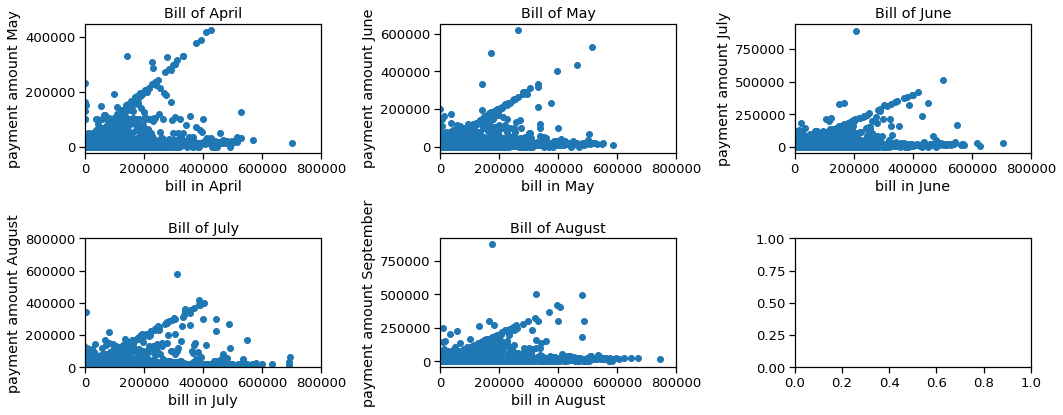

In [ ]:
# Payment Amount and Bill Amount

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

axes[0, 0].scatter(x = df['bill_apr'], y = df['payment_amount_may'])
axes[0, 0].set_xlabel('bill in April')
axes[0, 0].set_ylabel('payment amount May')
axes[0, 0].set_title('Bill of April')
axes[0, 0].set_xlim([0, 800000])

axes[0, 1].scatter(x = df['bill_may'], y = df['payment_amount_jun'])
axes[0, 1].set_xlabel('bill in May')
axes[0, 1].set_ylabel('payment amount June')
axes[0, 1].set_title('Bill of May')
axes[0, 1].set_xlim([0, 800000])

axes[0, 2].scatter(x = df['bill_jun'], y = df['payment_amount_jul'])
axes[0, 2].set_xlabel('bill in June')
axes[0, 2].set_ylabel('payment amount July')
axes[0, 2].set_title('Bill of June')
axes[0, 2].set_xlim([0, 800000])

axes[1, 0].scatter(x = df['bill_jul'], y = df['payment_amount_aug'])
axes[1, 0].set_xlabel('bill in July')
axes[1, 0].set_ylabel('payment amount August')
axes[1, 0].set_title('Bill of July')
axes[1, 0].set_xlim([0, 800000])
axes[1, 0].set_ylim([0, 800000])

axes[1, 1].scatter(x = df['bill_aug'], y = df['payment_amount_sept'])
axes[1, 1].set_xlabel('bill in August')
axes[1, 1].set_ylabel('payment amount September')
axes[1, 1].set_title('Bill of August')
axes[1, 1].set_xlim([0, 800000])

plt.tight_layout()

Có thể thấy hầy hết khách hàng thanh toán ít hơn 200.000 trong các tháng. Nhìn vào các biểu đồ mật độ ta thấy, có 2 xu hướng chính. Xu hướng thứ nhất thanh toán đúng khoản nợ của họ (đường chéo). Thứ 2 là họ thanh toán ít hơn số bill. </br>
Biểu đồ này chỉ đánh giá 2 tháng gần nhau

### Quan hệ giữa các features

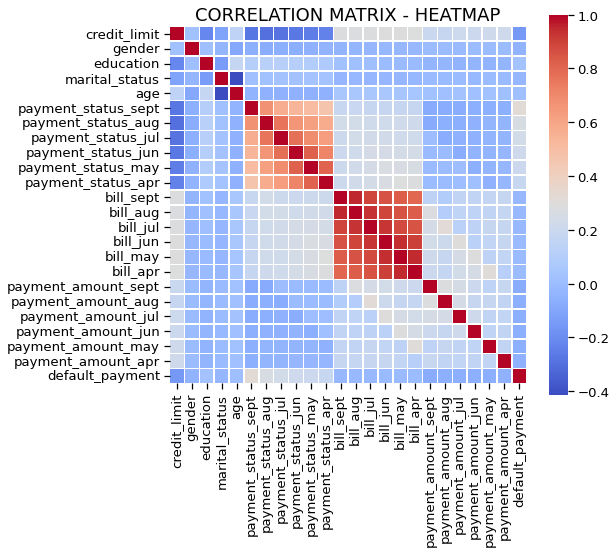

In [ ]:
# Features correlation
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Nhìn vào heatmap ta thấy:
- "Age" và "Marital_status" không liên quan gì tới nhau.
- Bill giữa các tháng có liên quan mạnh tới nhau. Nhưng số tiền thanh toán của các tháng lại không liên quan gì tới nhau.
- Hơn nữa, quan hệ giữa bill và payment của các tháng không liên quan tới nhau, điều này cho thấy, hầu hết khách hàng đều không thanh toán đúng với bill của họ trong tháng đó.


## Khám phá thêm về dữ liệu
1. Kiểm tra những khách hàng không sử dụng tín dụng trong cả 6 tháng

In [ ]:
# Customers with no consumption for the past 6 months

fil = ((df.bill_apr == 0) & (df.bill_may == 0) & (df.bill_jun == 0) & (df.bill_jul == 0) & (df.bill_aug == 0) & (df.bill_sept == 0) )
#fil = ((df.payment_status_aug == 2) & (df.bill_aug > 0) & (df.payment_amount_sept > 0))
df[fil][['payment_status_apr', 'bill_apr', 'payment_amount_may', 'payment_status_may',
         'bill_may','payment_amount_jun', 'payment_status_jun','bill_jun','payment_amount_jul', 'payment_status_jul','bill_jul',
        'payment_amount_aug', 'payment_status_aug','bill_aug','payment_amount_sept', 'payment_status_sept','bill_sept','default_payment']]

,payment_status_apr,bill_apr,payment_amount_may,payment_status_may,bill_may,payment_amount_jun,payment_status_jun,bill_jun,payment_amount_jul,payment_status_jul,bill_jul,payment_amount_aug,payment_status_aug,bill_aug,payment_amount_sept,payment_status_sept,bill_sept,default_payment
18,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,0
19,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,0
45,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,1
79,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
121,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,1
29909,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0
29973,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
29979,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0


Ta thấy có 866 khách hàng không sử dụng thẻ tín dụng cả 6 tháng.
 </br> Ngân hàng cần đưa ra một số offer để giữ chân khách hàng.

In [ ]:
# No bill amount but default payment next month (1)

fil = ((df.bill_apr == 0) & (df.bill_may == 0) & (df.bill_jun == 0) & (df.bill_jul == 0) & (df.bill_aug == 0) & (df.bill_sept == 0) & (df.default_payment == 1))
#fil = ((df.payment_status_aug == 2) & (df.bill_aug > 0) & (df.payment_amount_sept > 0))
df[fil][['payment_status_apr', 'payment_amount_apr', 'bill_apr', 'payment_status_may', 'payment_amount_may',
         'bill_may','payment_amount_jun', 'payment_status_jun','bill_jun','payment_amount_jul', 'payment_status_jul','bill_jul',
        'payment_amount_aug', 'payment_status_aug','bill_aug','payment_amount_sept', 'payment_status_sept','bill_sept','default_payment']]

,payment_status_apr,payment_amount_apr,bill_apr,payment_status_may,payment_amount_may,bill_may,payment_amount_jun,payment_status_jun,bill_jun,payment_amount_jul,payment_status_jul,bill_jul,payment_amount_aug,payment_status_aug,bill_aug,payment_amount_sept,payment_status_sept,bill_sept,default_payment
45,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,1
79,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
121,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
140,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
272,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,1
29823,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
29830,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,1,0.0,1
29908,-2,0.0,0.0,-2,0.0,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,0.0,-2,0.0,1


Ta thấy có ngoại lệ ở đây, với 866 khách hàng có 317 khách hàng không sử dụng thẻ tín dụng Nhưng vẫn được coi là vỡ nợ. Do vậy, nhóm sẽ tiến hành chuyển dèault payment thành 0 của 317 khách hàng này trong phần Feature Engineering

## Feature Engineering
Nhóm sẽ tiến hành tiền xử lý dữ liệu sau khi đã phân tích một số tính chất. Và đánh giá dữ liệu chưa được xử lý với dữ iệu đã qua xử lý.

In [ ]:
# Variable 'education': group the categories 0, 4, 5, 6 into a single class '0' (others)
# as the document describes
df['education']=np.where(df['education'] == 4, 0, df['education'])
df['education']=np.where(df['education'] == 5, 0, df['education'])
df['education']=np.where(df['education'] == 6, 0, df['education'])

In [ ]:
## Fix the problem of no consumption customers having default payment next month
# Those 317 customers will be assigned 0 for the target variable
df['default_payment'] = [ 0 if (df['bill_apr'][i] == 0) and (df['bill_may'][i] == 0) and (df['bill_jun'][i] == 0) and
                        (df['bill_jul'][i] == 0) and (df['bill_aug'][i] == 0) and (df['bill_sept'][i] == 0) and
                       (df['default_payment'][i] == 1)  else df['default_payment'][i] for i in range(df.shape[0])]


In [ ]:
# Function to correct the payment status

def pay_status(bill_1, pay_amt_2,pay_status):


    if bill_1 == 0 and pay_amt_2 == 0 : # no consumption
        pay_status = -2
    elif bill_1 <=pay_amt_2 : # paid in full
        pay_status = -1
    elif pay_status == 0 : # the use of revolving credit
        pay_status = 0
    else: # all late payment move 1 month forward
        pay_status = pay_status -1

    return pay_status

In [ ]:
## Create a new data frame for modification of the payment status
df_new_feature = df.copy()

df_new_feature['pay_status_apr'] = df_new_feature.apply(lambda row : pay_status(row['bill_apr'],row['payment_amount_may'],row['payment_status_apr']), axis = 1)
df_new_feature['pay_status_may'] = df_new_feature.apply(lambda row : pay_status(row['bill_may'],row['payment_amount_jun'],row['payment_status_may']), axis = 1)
df_new_feature['pay_status_jun'] = df_new_feature.apply(lambda row : pay_status(row['bill_jun'],row['payment_amount_jul'],row['payment_status_jun']), axis = 1)
df_new_feature['pay_status_jul'] = df_new_feature.apply(lambda row : pay_status(row['bill_jul'],row['payment_amount_aug'],row['payment_status_jul']), axis = 1)
df_new_feature['pay_status_aug'] = df_new_feature.apply(lambda row : pay_status(row['bill_aug'],row['payment_amount_sept'],row['payment_status_aug']), axis = 1)

In [ ]:
# Drop the old payment status for the new data frame

df_new_feature = df_new_feature.drop(['payment_status_sept','payment_status_aug','payment_status_jul',
                                    'payment_status_jun','payment_status_may','payment_status_apr'], axis = 1)
df_new_feature.head()

,credit_limit,gender,education,marital_status,age,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default_payment,pay_status_apr,pay_status_may,pay_status_jun,pay_status_jul,pay_status_aug
0,20000.0,2,2,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2.0,-2.0,-2.0,-1.0,1.0
1,120000.0,2,2,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1.0,0.0,0.0,0.0,1.0
2,90000.0,2,2,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,0.0,0.0,0.0
3,50000.0,2,2,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,0.0,0.0,0.0,0.0
4,50000.0,1,2,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,0.0,0.0,-1.0,0.0


In [ ]:
## Original data frame
# one hot encode all the categorical features

df[['gender','marital_status','education']] = df[['gender','marital_status','education']].astype('object')

#One Hot encoding
df = pd.get_dummies(df)
df.head()

,credit_limit,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default_payment,gender_1,gender_2,education_0,education_1,education_2,education_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,1,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,1,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1,0,0,1,0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,0,1,0,0,1,0,0


## Train-Test Split & Sampling
Có 3 cách để xử lý Imbalance
1. Random Oversampling
2. Random Undersampling
3. SMOTE: Synthetic Minority Oversampling Technique

In [ ]:
## Original data frame
# Split the df into train and test sets

X = df.drop(['default_payment'], axis=1)
y = df['default_payment']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
## Original data frame
# Create the training df by remerging X_train and y_train

df_train = X_train.join(y_train)

In [ ]:
# Check the distribution of the samples in the train dataset

# Separate majority and minority classes
df_majority = df_train[df_train.default_payment == 0]
df_minority = df_train[df_train.default_payment == 1]

major_percent = df_majority.default_payment.count()/ df_train.shape[0]*100
minor_percent = df_minority.default_payment.count()/ df_train.shape[0]*100

print('Customers with No Default Payment Next Month :')
print(f'{df_majority.default_payment.count()}({round(major_percent,2)}%)')
print("-----------")
print('Customers with Default Payment Next Month :')
print(f'{df_minority.default_payment.count()}({round(minor_percent,2)}%)')
print("-----------")
# print(df_train.default_payment.value_counts())
# the imbalanced train dataset

Customers with No Default Payment Next Month :
16557(78.84%)
-----------
Customers with Default Payment Next Month :
4443(21.16%)
-----------


In [ ]:
# A) Random Oversampling:

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples = int(16557*0.8),    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default_payment.value_counts()

0    16557
1    13245
Name: default_payment, dtype: int64

In [ ]:
# B) Random Undersampling:

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=int(4443*2),     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default_payment.value_counts()

0    8886
1    4443
Name: default_payment, dtype: int64

In [ ]:
# C) SMOTE: Synthetic Minority Oversampling Technique

sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

33114
16557


Second Dataset with Payment Status Modified :

In [ ]:
## Data frame with modified payment status
# Split the df into train and test sets

X_nf = df_new_feature.drop(['default_payment'], axis=1)
y_nf = df_new_feature['default_payment']

X_nf_train, X_nf_test, y_nf_train, y_nf_test = train_test_split(X_nf,y_nf, test_size=0.3, random_state=42)

In [ ]:
## Data frame with modified payment status
# Create the training df by remerging X_train and y_train

df_nf_train = X_nf_train.join(y_nf_train)

In [ ]:
# Check the distribution of the samples in the train dataset

# Separate majority and minority classes
df_nf_majority = df_nf_train[df_nf_train.default_payment == 0]
df_nf_minority = df_nf_train[df_nf_train.default_payment == 1]

major_nf_percent = df_nf_majority.default_payment.count()/ df_nf_train.shape[0]*100
minor_nf_percent = df_nf_minority.default_payment.count()/ df_nf_train.shape[0]*100

print('Customers with No Default Payment Next Month :')
print(f'{df_nf_majority.default_payment.count()}({round(major_nf_percent,2)}%)')
print("-----------")
print('Customers with Default Payment Next Month :')
print(f'{df_nf_minority.default_payment.count()}({round(minor_nf_percent,2)}%)')
print("-----------")

Customers with No Default Payment Next Month :
16557(78.84%)
-----------
Customers with Default Payment Next Month :
4443(21.16%)
-----------


In [ ]:
# A) Random Oversampling:

# Upsample minority class
df_nf_minority_upsampled = resample(df_nf_minority,
                                 replace=True,     # sample with replacement
                                 n_samples = int(16557*0.8),    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_nf_upsampled = pd.concat([df_nf_majority, df_nf_minority_upsampled])
# Display new class counts
df_nf_upsampled.default_payment.value_counts()

0    16557
1    13245
Name: default_payment, dtype: int64

In [ ]:
# B) Random Undersampling:

# Downsample majority class
df_nf_majority_downsampled = resample(df_nf_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=int(4443*2),     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_nf_downsampled = pd.concat([df_nf_majority_downsampled, df_nf_minority])
# Display new class counts
df_nf_downsampled.default_payment.value_counts()

0    8886
1    4443
Name: default_payment, dtype: int64

In [ ]:
# C) SMOTE: Synthetic Minority Oversampling Technique

sm = SMOTE(random_state=42)
X_nf_SMOTE, y_nf_SMOTE = sm.fit_resample(X_nf_train, y_nf_train)
print(len(y_nf_SMOTE))
print(y_nf_SMOTE.sum())

33114
16557


In [ ]:
## Original Dataset
# List of training set with different sampling methods

xtrain_data = [X_train,df_upsampled.drop('default_payment',axis = 1),df_downsampled.drop('default_payment',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment'],df_downsampled['default_payment'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

In [ ]:
## Modified Dataset
# List of training set with different sampling methods

xtrain_nf_data = [X_nf_train,df_nf_upsampled.drop('default_payment',axis = 1),df_nf_downsampled.drop('default_payment',axis = 1),X_nf_SMOTE]
ytrain_nf_data = [y_nf_train,df_nf_upsampled['default_payment'],df_nf_downsampled['default_payment'],y_nf_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

## Predictive Models
### Metric
For evaluation, we choose recall as the metric as we would like to predict which customers are likely to have default payment next month based on prudence -- we rather overestimate the potential loss/short of income flow than underestimate it in the perspective of cash flow control and risk management. We want to identify as many default customers as possible even though some of them are not actually defaulted. Recall is the ratio of True Positive over the sum of True Positive and False Negative which is the probability that we predict correctly.

In [ ]:
# Define a function which evaluates the model with train and test score
# and also performs a K-fold cross validation on the train dataset

def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))
    print('Overall Train recall',recall_score(ytrain,y_pred))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]

    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))


    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)

    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))

    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()

## I. Naive bayes

Data is  Normal Sampling
Overall Train Accuracy 0.6140476190476191
Train AUC Score 0.7394096979869609
Overall Train recall 0.7402655863155525
Overall Test Accuracy 0.6043333333333333
Test AUC Score 0.7288822715850443
Classification Report of Test
               precision    recall  f1-score   support

           0       0.89      0.57      0.70      7124
           1       0.31      0.72      0.43      1876

    accuracy                           0.60      9000
   macro avg       0.60      0.65      0.56      9000
weighted avg       0.77      0.60      0.64      9000

K-Fold scores: 0.655 (+/- 0.00060)


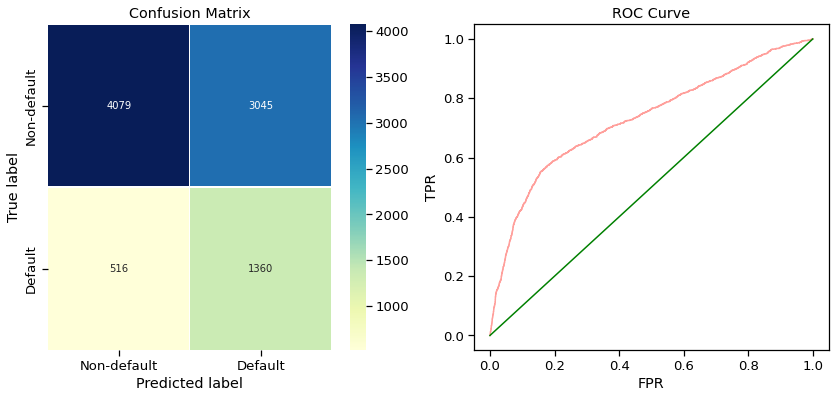

____________________________________________________________
Data is  Over Sampling
Overall Train Accuracy 0.5838869874505067
Train AUC Score 0.738440941394375
Overall Train recall 0.8224235560588902
Overall Test Accuracy 0.47988888888888886
Test AUC Score 0.7260516270416586
Classification Report of Test
               precision    recall  f1-score   support

           0       0.89      0.39      0.54      7124
           1       0.26      0.82      0.40      1876

    accuracy                           0.48      9000
   macro avg       0.58      0.60      0.47      9000
weighted avg       0.76      0.48      0.51      9000

K-Fold scores: 0.608 (+/- 0.00002)


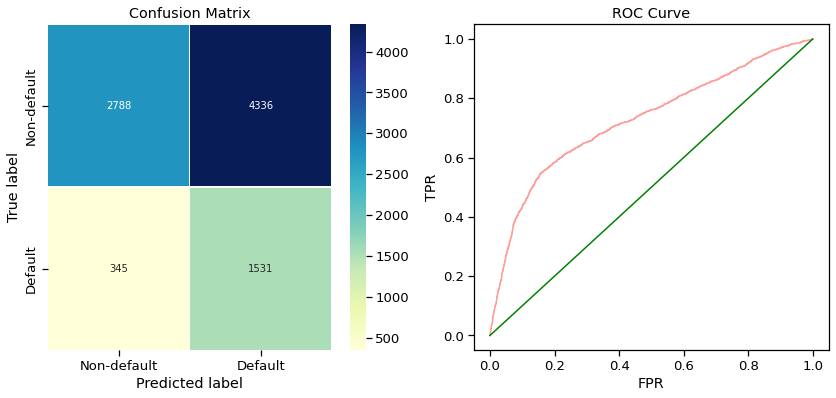

____________________________________________________________
Data is  Under Sampling
Overall Train Accuracy 0.5903668692325006
Train AUC Score 0.7376026006561518
Overall Train recall 0.7744767049291019
Overall Test Accuracy 0.5495555555555556
Test AUC Score 0.7294728605907657
Classification Report of Test
               precision    recall  f1-score   support

           0       0.89      0.49      0.63      7124
           1       0.28      0.77      0.42      1876

    accuracy                           0.55      9000
   macro avg       0.59      0.63      0.52      9000
weighted avg       0.76      0.55      0.59      9000

K-Fold scores: 0.633 (+/- 0.00043)


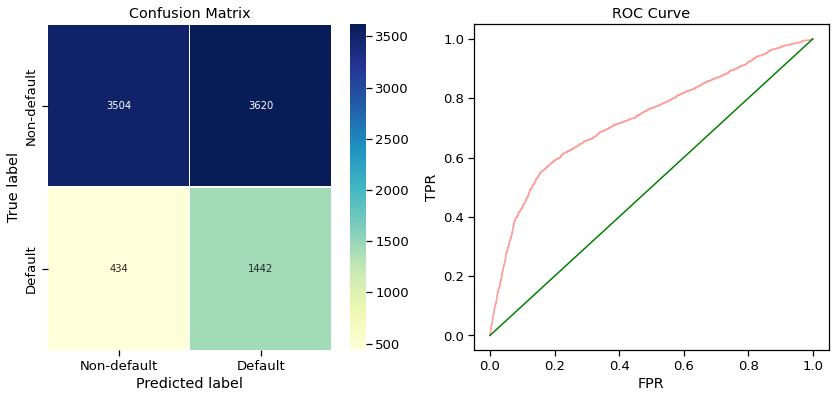

____________________________________________________________
Data is  SMOTE
Overall Train Accuracy 0.5963036782025729
Train AUC Score 0.7982880387922635
Overall Train recall 0.9423204686839404
Overall Test Accuracy 0.383
Test AUC Score 0.7115256665657036
Classification Report of Test
               precision    recall  f1-score   support

           0       0.90      0.25      0.39      7124
           1       0.24      0.89      0.38      1876

    accuracy                           0.38      9000
   macro avg       0.57      0.57      0.38      9000
weighted avg       0.76      0.38      0.39      9000

K-Fold scores: 0.596 (+/- 0.00001)


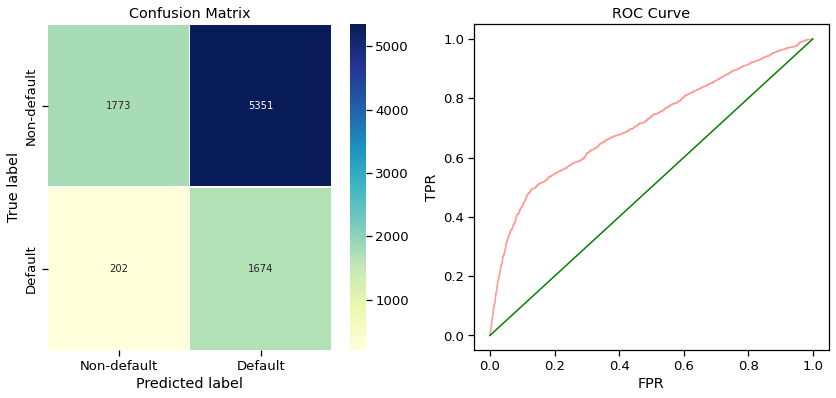

____________________________________________________________


In [ ]:
## Original Dataset

# Result of each Sampling Method
index = [0,1,2,3]
for Xtrain,ytrain,sampleName,i in zip(xtrain_data,ytrain_data,name, index):
    print('Data is ',sampleName)
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    standardized_Xtest = ss.transform(X_test)
    model_eval(GaussianNB(), standardized_Xtrain_df,ytrain,standardized_Xtest,y_test)
    print("_" * 60)


Data is  Normal Sampling
Overall Train Accuracy 0.552
Train AUC Score 0.7139791985212733
Overall Train recall 0.746342561332433
Overall Test Accuracy 0.5496666666666666
Test AUC Score 0.7006872022737041
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.50      0.64      7124
           1       0.28      0.73      0.40      1876

    accuracy                           0.55      9000
   macro avg       0.58      0.62      0.52      9000
weighted avg       0.75      0.55      0.59      9000

K-Fold scores: 0.621 (+/- 0.00033)


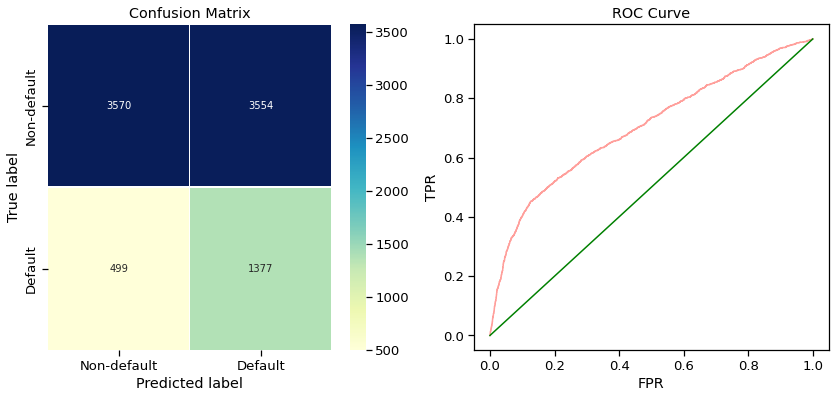

____________________________________________________________
Data is  Over Sampling
Overall Train Accuracy 0.5583853432655527
Train AUC Score 0.711221062222493
Overall Train recall 0.8488486221215553
Overall Test Accuracy 0.434
Test AUC Score 0.6981800610327683
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.33      0.48      7124
           1       0.25      0.84      0.38      1876

    accuracy                           0.43      9000
   macro avg       0.57      0.58      0.43      9000
weighted avg       0.75      0.43      0.46      9000

K-Fold scores: 0.588 (+/- 0.00001)


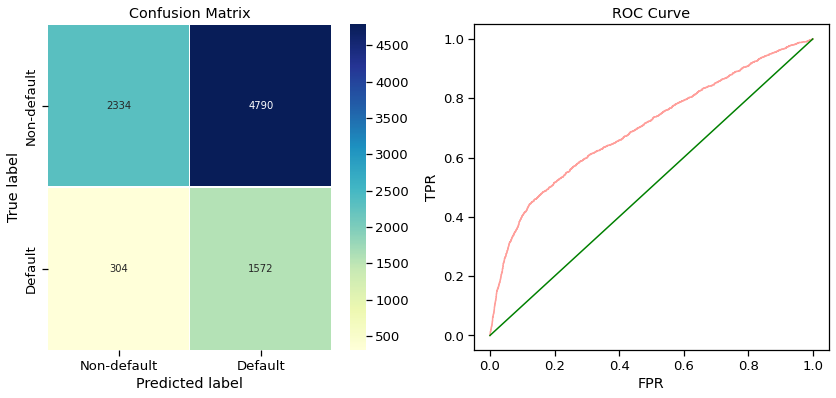

____________________________________________________________
Data is  Under Sampling
Overall Train Accuracy 0.5512791657288619
Train AUC Score 0.7128736066095215
Overall Train recall 0.7780778753094756
Overall Test Accuracy 0.5074444444444445
Test AUC Score 0.7010712759296482
Classification Report of Test
               precision    recall  f1-score   support

           0       0.88      0.44      0.58      7124
           1       0.27      0.78      0.40      1876

    accuracy                           0.51      9000
   macro avg       0.57      0.61      0.49      9000
weighted avg       0.75      0.51      0.54      9000

K-Fold scores: 0.605 (+/- 0.00026)


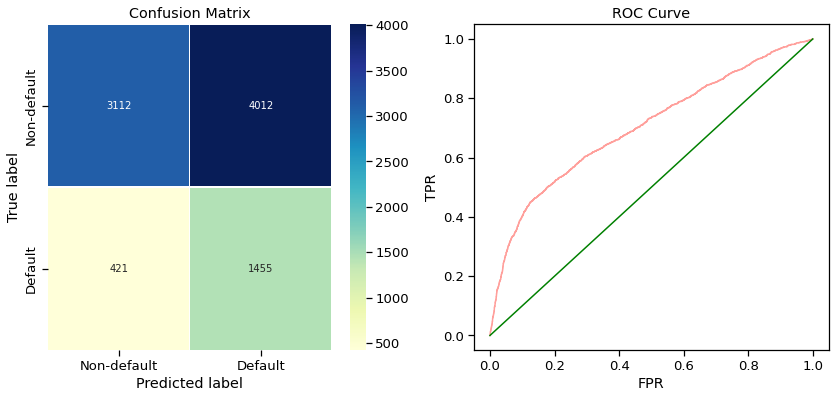

____________________________________________________________
Data is  SMOTE
Overall Train Accuracy 0.6009844778643474
Train AUC Score 0.750785435423649
Overall Train recall 0.906806788669445
Overall Test Accuracy 0.415
Test AUC Score 0.6930403728529886
Classification Report of Test
               precision    recall  f1-score   support

           0       0.89      0.30      0.45      7124
           1       0.24      0.86      0.38      1876

    accuracy                           0.41      9000
   macro avg       0.57      0.58      0.41      9000
weighted avg       0.76      0.41      0.43      9000

K-Fold scores: 0.601 (+/- 0.00004)


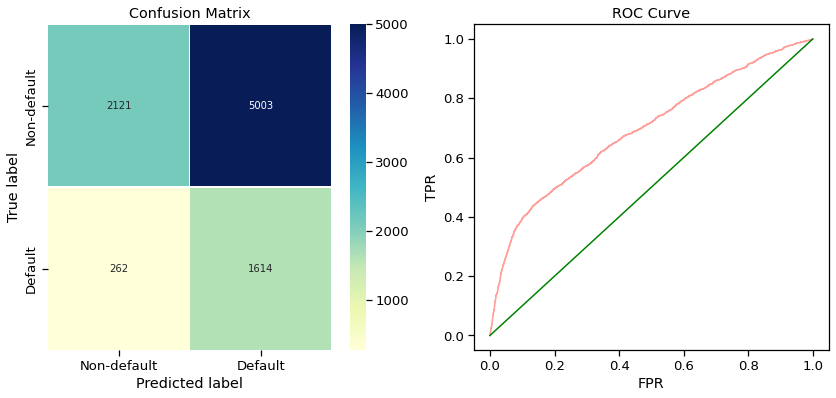

____________________________________________________________


In [ ]:
## Modified Dataset

# Result of each Sampling Method

for Xtrain,ytrain,sampleName in zip(xtrain_nf_data,ytrain_nf_data,name):
    print('Data is ',sampleName)
    ss = StandardScaler()
    standardized_Xtrain = ss.fit_transform(Xtrain)
    standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
    standardized_Xtest = ss.transform(X_nf_test)
    model_eval(GaussianNB(), standardized_Xtrain_df,ytrain,standardized_Xtest,y_nf_test)
    print("_" * 60)

____________________________________________________________
So far Naive Bayes is the best model in terms of recall of class 1 in this case. We can see that it performs well with SMOTE sampling method of the original dataset(i.e. payment status are continuous variable) but its performances are terrible with the modified dataset(i.e. payment status are categorical variable) because of the assumptions of the model:

Naive Bayes model's perfomance is not good in this case as our case cannot satisfy one of the assumption of Naive Bayes model: assumption of independent predictors. The model implicitly assumes that all the attributes are mutually independent but our payment status are positively correlated to each other. On the other hand, Zero Frequency may happen when categorical variable has a category is not observed in training data set but in the test set, then model will assign a 0 (zero) probability and will be unable to make a prediction. In short, Naive Bayes does not work well with categorical variables.

## II. Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  precision_score, roc_auc_score
naive_bayes = GaussianNB()
ss = StandardScaler()
standardized_Xtrain = ss.fit_transform(Xtrain)
standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
standardized_Xtest = ss.transform(X_nf_test)
naive_bayes.fit(standardized_Xtrain,ytrain)
y_pred = naive_bayes.predict(standardized_Xtest)
cm = confusion_matrix(y_nf_test, y_pred)
roc=roc_auc_score(y_nf_test, y_pred)
acc = accuracy_score(y_nf_test, y_pred)
prec = precision_score(y_nf_test, y_pred)
rec = recall_score(y_nf_test, y_pred)
f1 = f1_score(y_nf_test, y_pred)

model= pd.DataFrame([['Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Bayes,0.41,0.24,0.86,0.38,0.58


## Decision Tree

In [ ]:
## Original Dataset

# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_data,ytrain_data,name):
    print('Data is ',sampleName)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'recall',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(Xtrain, ytrain)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",sampleName)
    print("_" * 100)

In [ ]:
# Best Parameter of each Sampling Method

param_dt = [{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 19},
               {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 5},
               {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 39},
               {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 29}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 19}
Overall Train Accuracy 0.8355238095238096
Train AUC Score 0.7683263231958251
Overall Train recall 0.41368444744541977
Overall Test Accuracy 0.8276666666666667
Test AUC Score 0.7512369221910021
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      7124
           1       0.65      0.38      0.48      1876

    accuracy                           0.83      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000

K-Fold scores: 0.667 (+/- 0.00004)


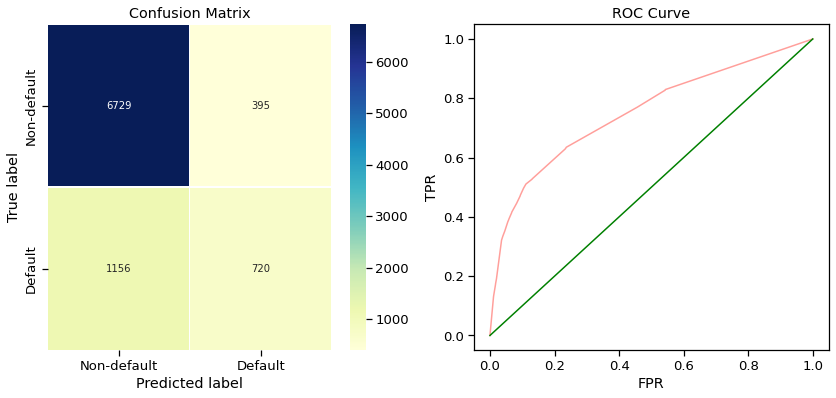

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 5}
Overall Train Accuracy 0.9450708006174082
Train AUC Score 0.9903101843881323
Overall Train recall 0.9423178557946394
Overall Test Accuracy 0.7467777777777778
Test AUC Score 0.6312451064841031
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      7124
           1       0.40      0.45      0.42      1876

    accuracy                           0.75      9000
   macro avg       0.63      0.64      0.63      9000
weighted avg       0.76      0.75      0.75      9000

K-Fold scores: 0.828 (+/- 0.00002)


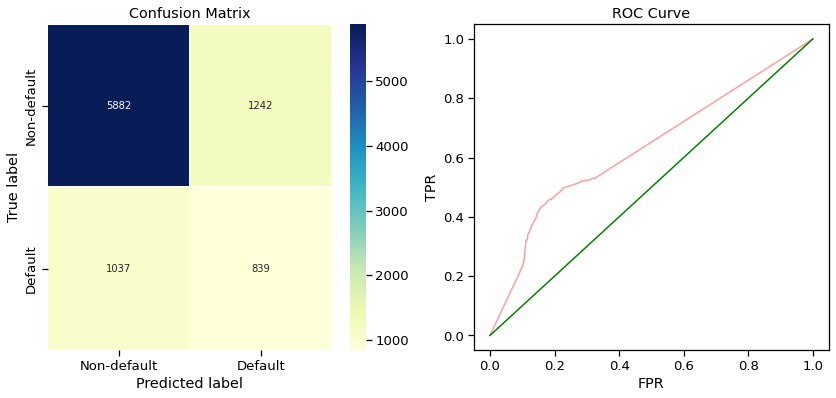

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 7, 'min_samples_split': 39}
Overall Train Accuracy 0.8268437242103683
Train AUC Score 0.9045829665066536
Overall Train recall 0.6747693000225073
Overall Test Accuracy 0.7504444444444445
Test AUC Score 0.7142444112157588
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7124
           1       0.42      0.50      0.45      1876

    accuracy                           0.75      9000
   macro avg       0.64      0.66      0.65      9000
weighted avg       0.77      0.75      0.76      9000

K-Fold scores: 0.666 (+/- 0.00016)


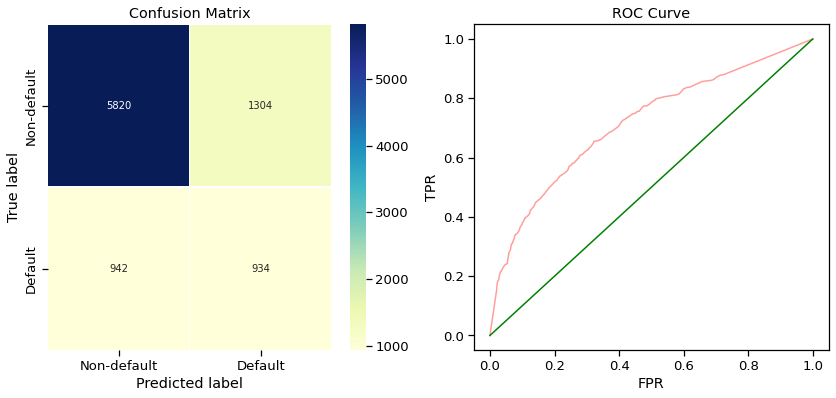

____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 29}
Overall Train Accuracy 0.9065651990094824
Train AUC Score 0.9734538186069557
Overall Train recall 0.8763664915141632
Overall Test Accuracy 0.7677777777777778
Test AUC Score 0.6833540172922187
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      7124
           1       0.44      0.39      0.41      1876

    accuracy                           0.77      9000
   macro avg       0.64      0.63      0.63      9000
weighted avg       0.76      0.77      0.76      9000

K-Fold scores: 0.832 (+/- 0.00001)


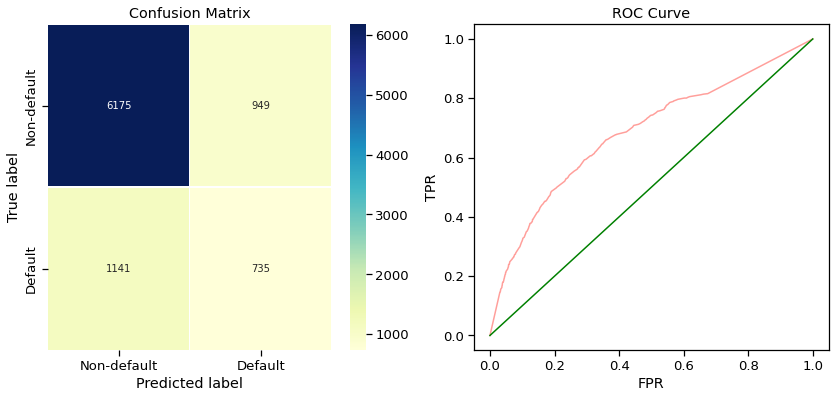

____________________________________________________________


In [ ]:
# Result of each Sampling Method

index = [0,1,2,3]

for Xtrain,ytrain,sampleName,index in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_dt[index])
    model_eval(DecisionTreeClassifier(**param_dt[index],random_state= 42), Xtrain,ytrain,X_test,y_test)
    print("_" * 60)

In [ ]:
## Modified Dataset

# Find out the best parameters for all the datasets

for Xtrain,ytrain,sampleName in zip(xtrain_nf_data,ytrain_nf_data,name):
    print('Data is ',sampleName)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'recall',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(Xtrain, ytrain)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",sampleName)
    print("_" * 100)

Data is  Normal Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 12} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 11} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 7, 'min_samples_split': 24} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 6} for SMOTE
_________________________________________________________________

In [ ]:
# Best Parameter of each Sampling Method

param_dt = [{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 14},
            {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 5},
            {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 6},
           {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 13}]

In [ ]:
# Result of each Sampling Method

index = [0,1,2,3]

for Xtrain,ytrain,sampleName,index in zip(xtrain_nf_data,ytrain_nf_data,name,index):
    print('Data is ',sampleName ,' And with hyper parameter ',param_dt[index])
    model_eval(DecisionTreeClassifier(**param_dt[index],random_state= 42), Xtrain,ytrain,X_nf_test,y_nf_test)
    print("_" * 60)


Data is  Normal Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 14}


NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
ss = StandardScaler()
standardized_Xtrain = ss.fit_transform(Xtrain)
standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
standardized_Xtest = ss.transform(X_nf_test)
dct.fit(standardized_Xtrain,ytrain)
y_pred = dct.predict(standardized_Xtest)
cm = confusion_matrix(y_nf_test, y_pred)
roc=roc_auc_score(y_nf_test, y_pred)
acc = accuracy_score(y_nf_test, y_pred)
prec = precision_score(y_nf_test, y_pred)
rec = recall_score(y_nf_test, y_pred)
f1 = f1_score(y_nf_test, y_pred)

ValueError: ignored

In [ ]:
model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.7,0.32,0.4,0.36,0.59


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
ss = StandardScaler()
standardized_Xtrain = ss.fit_transform(Xtrain)
standardized_Xtrain_df = pd.DataFrame(standardized_Xtrain,columns = Xtrain.columns)
standardized_Xtest = ss.transform(X_nf_test)
rfc.fit(standardized_Xtrain,ytrain)
y_pred = rfc.predict(standardized_Xtest)
cm = confusion_matrix(y_nf_test, y_pred)
roc=roc_auc_score(y_nf_test, y_pred)
acc = accuracy_score(y_nf_test, y_pred)
prec = precision_score(y_nf_test, y_pred)
rec = recall_score(y_nf_test, y_pred)
f1 = f1_score(y_nf_test, y_pred)
model = pd.DataFrame([['Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Bayes,0.79,0.51,0.36,0.42,0.63


ROC Curve
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

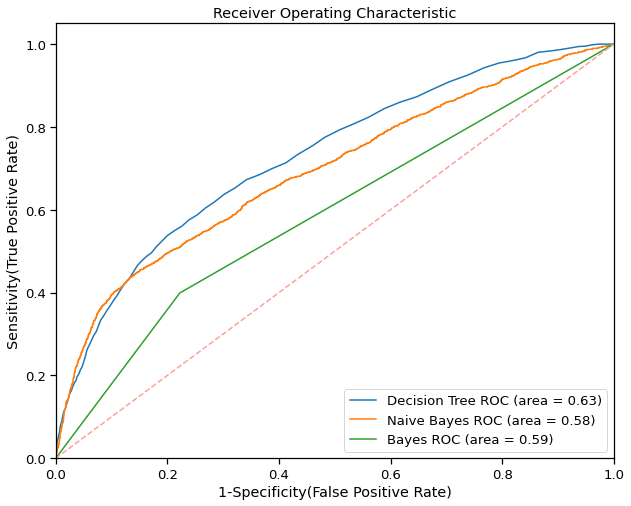

In [ ]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity
y_pred__naive_bayes_p =rfc.predict_proba(standardized_Xtest)[:,1]
y_pred_bayes_p =naive_bayes.predict_proba(standardized_Xtest)[:,1]
y_pred_dt_p =dct.predict_proba(standardized_Xtest)[:,1]

model = [rfc,naive_bayes,dct]

models = [y_pred__naive_bayes_p, y_pred_bayes_p,y_pred_dt_p]
label=['Decision Tree', 'Naive Bayes','Bayes']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(standardized_Xtest))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('FigureName.pdf')